In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 15

/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
df_fes = pd.read_csv('./fes.dat',skiprows=9,sep='\s+',header=None)
df_fes.columns = [ 'phi','psi','file.free', 'der_phi','der_psi']
df_fes

,phi,psi,file.free,der_phi,der_psi
0,-3.141593,-3.141593,-65.720751,-50.189415,16.448418
1,-3.095730,-3.141593,-68.000652,-49.041102,16.054460
2,-3.049867,-3.141593,-70.179273,-45.641544,15.855973
3,-3.004005,-3.141593,-72.155903,-40.439609,15.856387
4,-2.958142,-3.141593,-73.881341,-34.978956,15.969580
...,...,...,...,...,...
7256,2.912279,3.023042,-54.542044,-65.983232,10.523649
7257,2.958142,3.023042,-57.513414,-63.084551,10.916100
7258,3.004005,3.023042,-60.291272,-57.880918,11.793274
7259,3.049867,3.023042,-62.826760,-52.936945,12.550974


In [6]:
df_phi = df_fes['phi'].drop_duplicates()
#df_phi
print(len(df_phi))

137


In [7]:
df_psi = df_fes['psi'].drop_duplicates()
#df_psi
print(len(df_psi))

53


In [16]:
phi = np.array(df_fes['phi'][:137])
psi = np.array(df_fes['psi'][::137])
fes = np.array(df_fes['file.free'].values.reshape(53,137))
print(phi)
print(psi)
print(type(psi))

[-3.14159265 -3.09572999 -3.04986732 -3.00400465 -2.95814199 -2.91227932
 -2.86641666 -2.82055399 -2.77469132 -2.72882866 -2.68296599 -2.63710332
 -2.59124066 -2.54537799 -2.49951532 -2.45365266 -2.40778999 -2.36192732
 -2.31606466 -2.27020199 -2.22433932 -2.17847666 -2.13261399 -2.08675132
 -2.04088866 -1.99502599 -1.94916333 -1.90330066 -1.85743799 -1.81157533
 -1.76571266 -1.71984999 -1.67398733 -1.62812466 -1.58226199 -1.53639933
 -1.49053666 -1.44467399 -1.39881133 -1.35294866 -1.307086   -1.26122333
 -1.21536066 -1.16949799 -1.12363533 -1.07777266 -1.03191    -0.98604733
 -0.94018466 -0.894322   -0.84845933 -0.80259666 -0.756734   -0.71087133
 -0.66500866 -0.619146   -0.57328333 -0.52742066 -0.481558   -0.43569533
 -0.38983267 -0.34397    -0.29810733 -0.25224467 -0.206382   -0.16051933
 -0.11465667 -0.068794   -0.02293133  0.02293133  0.068794    0.11465667
  0.16051933  0.206382    0.25224467  0.29810733  0.34397     0.38983267
  0.43569533  0.481558    0.52742066  0.57328333  0

No handles with labels found to put in legend.


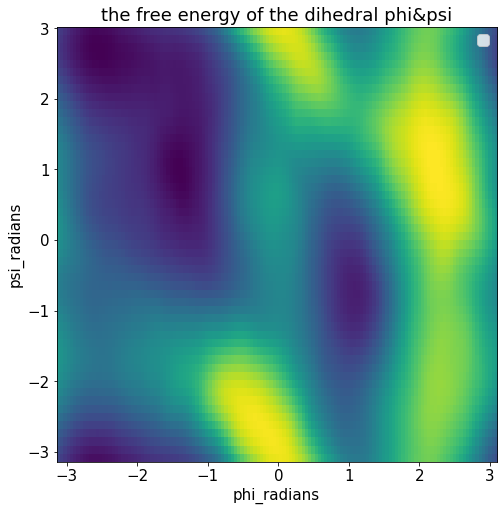

<Figure size 576x576 with 0 Axes>

In [18]:
plt.imshow(fes,origin='lower',extent=[phi[0],phi[-1],psi[0],psi[-1]])
plt.title('the free energy of the dihedral phi&psi')
plt.xlabel('phi_radians')
plt.ylabel('psi_radians')
plt.legend()
plt.show()
plt.savefig('./freeenergy_of_the_dihedral_phi&psi.png')

No handles with labels found to put in legend.


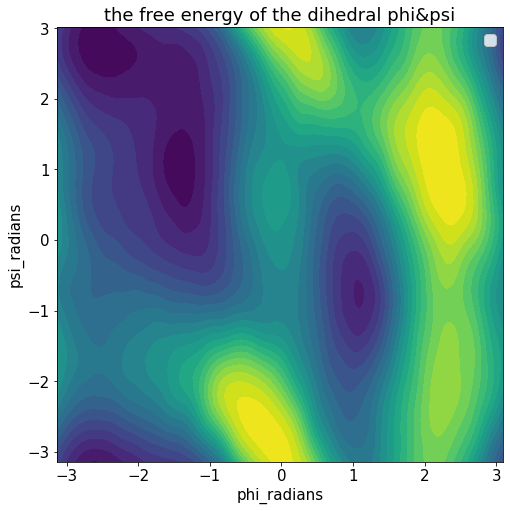

<Figure size 576x576 with 0 Axes>

In [21]:
plt.contourf(phi,psi,fes,20)
plt.title('the free energy of the dihedral phi&psi')
plt.xlabel('phi_radians')
plt.ylabel('psi_radians')
plt.legend()
plt.show()
plt.savefig('./freeenergy_of_the_dihedral_phi&psi_2.png')

No handles with labels found to put in legend.


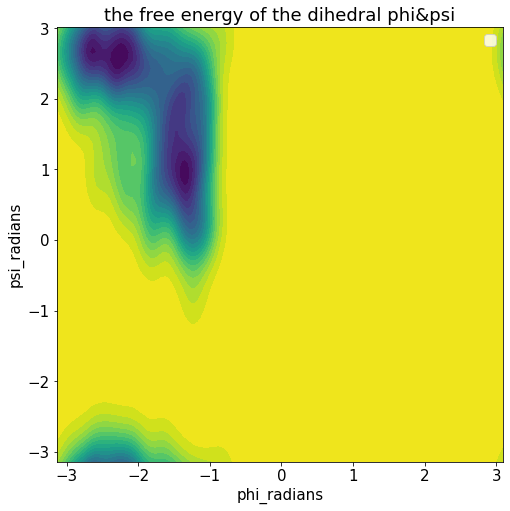

No handles with labels found to put in legend.


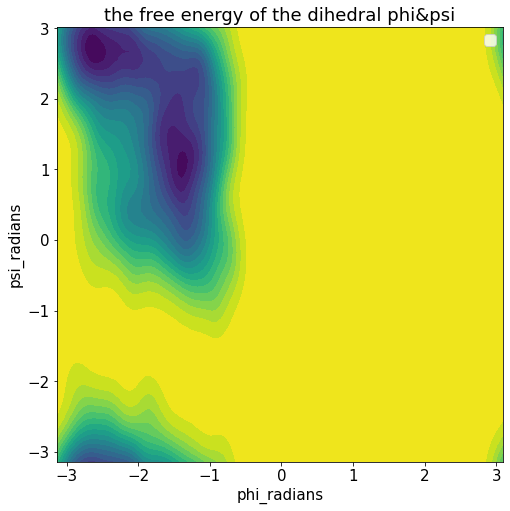

No handles with labels found to put in legend.


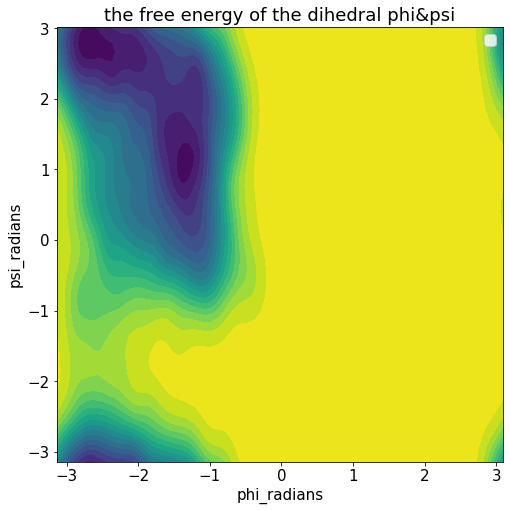

No handles with labels found to put in legend.


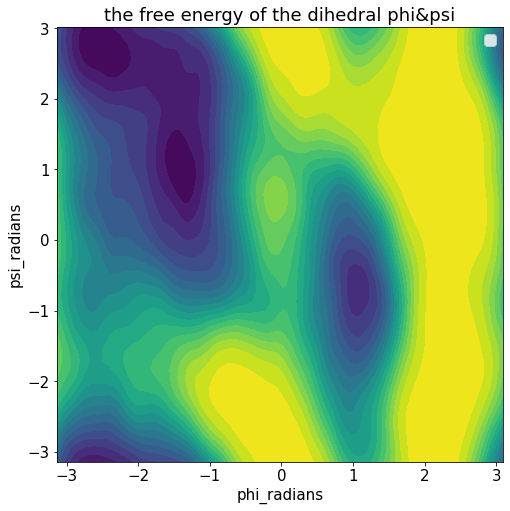

No handles with labels found to put in legend.


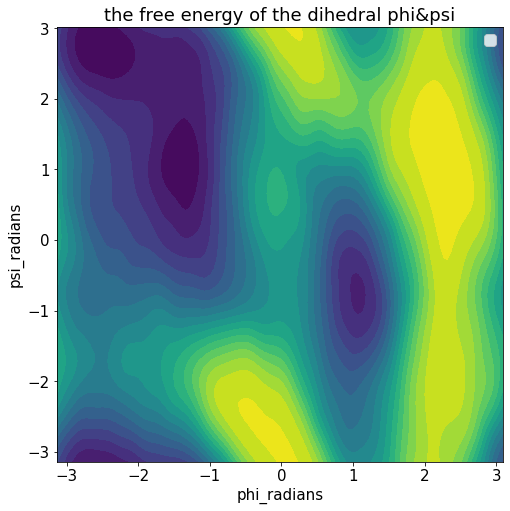

No handles with labels found to put in legend.


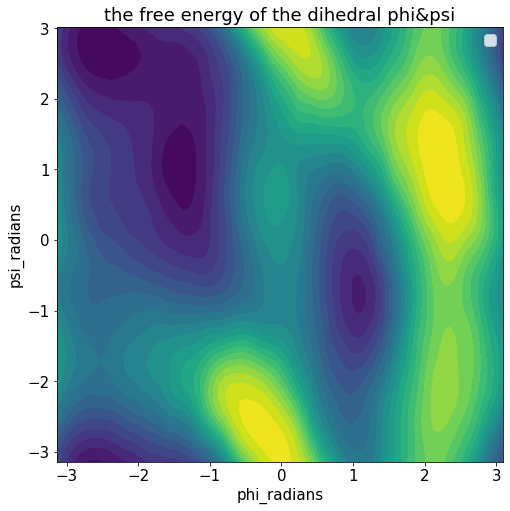

<Figure size 576x576 with 0 Axes>

In [22]:
ls_file=['1','5','10','50','100','200']
for i in ls_file:
    path= './fes_'+i+'.dat'
    df_fes = pd.read_csv(path,skiprows=9,sep='\s+',header=None)
    df_fes.columns = [ 'phi','psi','file.free', 'der_phi','der_psi']
    phi = np.array(df_fes['phi'][:137])
    psi = np.array(df_fes['psi'][::137])
    fes = np.array(df_fes['file.free'].values.reshape(53,137))
    plt.contourf(phi,psi,fes,20)
    plt.title('the free energy of the dihedral phi&psi')
    plt.xlabel('phi_radians')
    plt.ylabel('psi_radians')
    plt.legend()
    plt.show()
    plt.savefig('./freeenergy_of_the_dihedral_phi&psi_2_'+i+'.png')